In [1]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.experimental.set_memory_growth

<function tensorflow.python.framework.config.set_memory_growth(device, enable)>

In [4]:
import bing_image_downloader
print("Module imported successfully!")


Module imported successfully!


Remove Dodgy images

In [5]:
import os
output_dir = os.path.expanduser("~/Kitchen_Appliance_Classification/dataset/train")  
output_dir

'C:\\Users\\Ayusha/Kitchen_Appliance_Classification/dataset/train'

In [6]:
import os

output_dir = "C:/Kitchen Appliance Classification/dataset/train"

try:
    os.makedirs(output_dir, exist_ok=True)
    print("Folders created successfully!")
except Exception as e:
    print(f"Error creating folders: {e}")



Folders created successfully!


Preprocess the image

Augument

In [7]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [8]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
"""
import os
import random
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
import numpy as np

# Define dataset folders
base_dir = os.path.join(os.getcwd(), "dataset")
dataset_folders = ["train", "val", "test"]

# Define augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.3),
    A.CLAHE(p=0.3),
    A.GaussianBlur(p=0.1),
])

def augment_images(folder_path):
   
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if not os.path.isdir(category_path):
            continue
        
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            if not img_name.endswith(".jpg"):  # Ensure only image files are processed
                continue

            # Open the image
            image = Image.open(img_path)
            image = np.array(image)

            # Apply augmentations
            augmented = transform(image=image)
            augmented_image = augmented['image']

            # Convert back to PIL image and save in the same folder with a new name
            augmented_image_pil = Image.fromarray(augmented_image)
            new_img_name = f"aug_{img_name}"
            augmented_image_pil.save(os.path.join(category_path, new_img_name))

            print(f"Augmented {img_name} and saved as {new_img_name}")

# Apply augmentation to train, val, and test datasets
for folder in dataset_folders:
    folder_path = os.path.join(base_dir, folder)
    augment_images(folder_path)

print("🎉 Augmentation complete! All augmented images are saved in the same folders.")
"""

Augmented aug_aug_aug_blender appliance_10.jpg and saved as aug_aug_aug_aug_blender appliance_10.jpg
Augmented aug_aug_aug_blender appliance_102.jpg and saved as aug_aug_aug_aug_blender appliance_102.jpg
Augmented aug_aug_aug_blender appliance_103.jpg and saved as aug_aug_aug_aug_blender appliance_103.jpg
Augmented aug_aug_aug_blender appliance_107.jpg and saved as aug_aug_aug_aug_blender appliance_107.jpg
Augmented aug_aug_aug_blender appliance_110.jpg and saved as aug_aug_aug_aug_blender appliance_110.jpg
Augmented aug_aug_aug_blender appliance_111.jpg and saved as aug_aug_aug_aug_blender appliance_111.jpg
Augmented aug_aug_aug_blender appliance_120.jpg and saved as aug_aug_aug_aug_blender appliance_120.jpg
Augmented aug_aug_aug_blender appliance_121.jpg and saved as aug_aug_aug_aug_blender appliance_121.jpg
Augmented aug_aug_aug_blender appliance_122.jpg and saved as aug_aug_aug_aug_blender appliance_122.jpg
Augmented aug_aug_aug_blender appliance_126.jpg and saved as aug_aug_aug_au

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,   # Rotate images randomly
    width_shift_range=0.2,  
    height_shift_range=0.2,
    shear_range=0.2,  
    zoom_range=0.3,  
    horizontal_flip=True,  
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode="nearest"
)


In [10]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=30,  # Rotate images up to 30 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Flip images horizontally
    fill_mode="nearest",  # Fill missing pixels
    validation_split=0.2  # Splitting into training & validation
)

# Augmentation not needed for validation/testing
val_test_datagen = ImageDataGenerator(
    rescale=1.0/255,  
    validation_split=0.2
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    "C:/Kitchen Appliance Classification/dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = val_test_datagen.flow_from_directory(
    "C:/Kitchen Appliance Classification/dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)
train_generator = train_datagen.flow_from_directory(
    "C:/Kitchen Appliance Classification/dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)


Found 7430 images belonging to 9 classes.
Found 1853 images belonging to 9 classes.
Found 7430 images belonging to 9 classes.


In [12]:
"""data_test_path = "C:/Kitchen Appliance Classification/dataset/test"
data_train_path="C:/Kitchen Appliance Classification/dataset/train"
data_val_path="C:/Kitchen Appliance Classification/dataset/val"""

'data_test_path = "C:/Kitchen Appliance Classification/dataset/test"\ndata_train_path="C:/Kitchen Appliance Classification/dataset/train"\ndata_val_path="C:/Kitchen Appliance Classification/dataset/val'

In [13]:
"""img_width=180
img_height=180"""

'img_width=180\nimg_height=180'

In [12]:
data_test_path = "C:/Kitchen Appliance Classification/dataset/test"
data_train_path="C:/Kitchen Appliance Classification/dataset/train"
data_val_path="C:/Kitchen Appliance Classification/dataset/val"

# Define image dimensions
img_width = 180
img_height = 180

# Loading the training dataset with categorical labels
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,  # Path to training data
    shuffle=True,
    image_size=(img_width, img_height),
    label_mode='categorical'  # One-hot encode the labels
)

# Loading the validation dataset with categorical labels
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,  # Path to validation data
    shuffle=True,
    image_size=(img_width, img_height),
    label_mode='categorical'  # One-hot encode the labels
)

# Loading the test dataset with categorical labels
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,  # Path to test data
    shuffle=True,
    image_size=(img_width, img_height),
    label_mode='categorical'  # One-hot encode the labels
)

# Verifying the class mapping
data_cat = {i: class_name for i, class_name in enumerate(data_train.class_names)}
print("Class Mapping:", data_cat)

# Checking a sample batch shape
for images, labels in data_train.take(1):
    print(f"Batch shape: {images.shape}")


Found 9283 files belonging to 9 classes.
Found 4096 files belonging to 9 classes.
Found 3110 files belonging to 9 classes.
Class Mapping: {0: 'blender appliance', 1: 'dishwasher appliance', 2: 'espresso machine', 3: 'fridge appliance', 4: 'gas stove appliance', 5: 'kettle appliance', 6: 'microwave appliance', 7: 'pressure cooker appliance', 8: 'toaster appliance'}
Batch shape: (32, 180, 180, 3)


In [20]:
import tensorflow as tf
import numpy as np
from collections import Counter

# Extract labels from dataset
def get_label_distribution(dataset):
    all_labels = []
    for _, labels in dataset:
        all_labels.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot to class indices
    
    # Count occurrences
    label_counts = Counter(all_labels)
    
    return label_counts

# Get class distributions
train_distribution = get_label_distribution(data_train)
val_distribution = get_label_distribution(data_val)
test_distribution = get_label_distribution(data_test)

# Convert class indices to class names
class_names = data_train.class_names
train_dist_named = {class_names[k]: v for k, v in train_distribution.items()}
val_dist_named = {class_names[k]: v for k, v in val_distribution.items()}
test_dist_named = {class_names[k]: v for k, v in test_distribution.items()}

# Print the distributions
print("Training class distribution:", train_dist_named)
print("Validation class distribution:", val_dist_named)
print("Test class distribution:", test_dist_named)


Training class distribution: {'microwave appliance': 1031, 'fridge appliance': 1021, 'blender appliance': 1034, 'gas stove appliance': 1029, 'kettle appliance': 1037, 'espresso machine': 1036, 'pressure cooker appliance': 1036, 'toaster appliance': 1030, 'dishwasher appliance': 1029}
Validation class distribution: {'microwave appliance': 405, 'fridge appliance': 324, 'kettle appliance': 577, 'pressure cooker appliance': 511, 'espresso machine': 518, 'gas stove appliance': 379, 'blender appliance': 470, 'dishwasher appliance': 426, 'toaster appliance': 486}
Test class distribution: {'microwave appliance': 346, 'toaster appliance': 335, 'gas stove appliance': 350, 'espresso machine': 350, 'kettle appliance': 372, 'fridge appliance': 324, 'dishwasher appliance': 335, 'pressure cooker appliance': 366, 'blender appliance': 332}


In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increase rotation
    width_shift_range=0.3,  # More shift
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(data_train.class_names), activation="softmax")
])


C:\Users\Ayusha\AppData\Local\Temp\ipykernel_20188\3570441271.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


Plotting

In [25]:
import os

# Get class names from the training directory
class_names = sorted(os.listdir(data_train_path))  # Sort to ensure consistency
data_cat = {i: class_names[i] for i in range(len(class_names))}

print(data_cat)  # Check mapping
"""

import os
from PIL import Image

# Define dataset paths
base_dir = os.path.join(os.getcwd(), "dataset")
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Target image size
IMG_SIZE = (224, 224)

def resize_images(folder_path):
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if not os.path.isdir(category_path):
            continue

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            if not img_name.endswith((".jpg", ".jpeg", ".png")):
                continue  # Skip non-image files

            try:
                image = Image.open(img_path)
                image = image.resize(IMG_SIZE)  # Resize to 224x224
                image.save(img_path)  # Overwrite the original image
                print(f"✅ Resized {img_name} to {IMG_SIZE}")
            except Exception as e:
                print(f"❌ Error resizing {img_name}: {e}")

# Resize images in all three datasets
resize_images(train_dir)
resize_images(val_dir)
resize_images(test_dir)

print("🎯 All images resized to 224x224 successfully!")
"""

{0: 'blender appliance', 1: 'dishwasher appliance', 2: 'espresso machine', 3: 'fridge appliance', 4: 'gas stove appliance', 5: 'kettle appliance', 6: 'microwave appliance', 7: 'pressure cooker appliance', 8: 'toaster appliance'}


'\n\nimport os\nfrom PIL import Image\n\n# Define dataset paths\nbase_dir = os.path.join(os.getcwd(), "dataset")\ntrain_dir = os.path.join(base_dir, "train")\nval_dir = os.path.join(base_dir, "val")\ntest_dir = os.path.join(base_dir, "test")\n\n# Target image size\nIMG_SIZE = (224, 224)\n\ndef resize_images(folder_path):\n    for category in os.listdir(folder_path):\n        category_path = os.path.join(folder_path, category)\n        if not os.path.isdir(category_path):\n            continue\n\n        for img_name in os.listdir(category_path):\n            img_path = os.path.join(category_path, img_name)\n            if not img_name.endswith((".jpg", ".jpeg", ".png")):\n                continue  # Skip non-image files\n\n            try:\n                image = Image.open(img_path)\n                image = image.resize(IMG_SIZE)  # Resize to 224x224\n                image.save(img_path)  # Overwrite the original image\n                print(f"✅ Resized {img_name} to {IMG_SIZE}")\n  

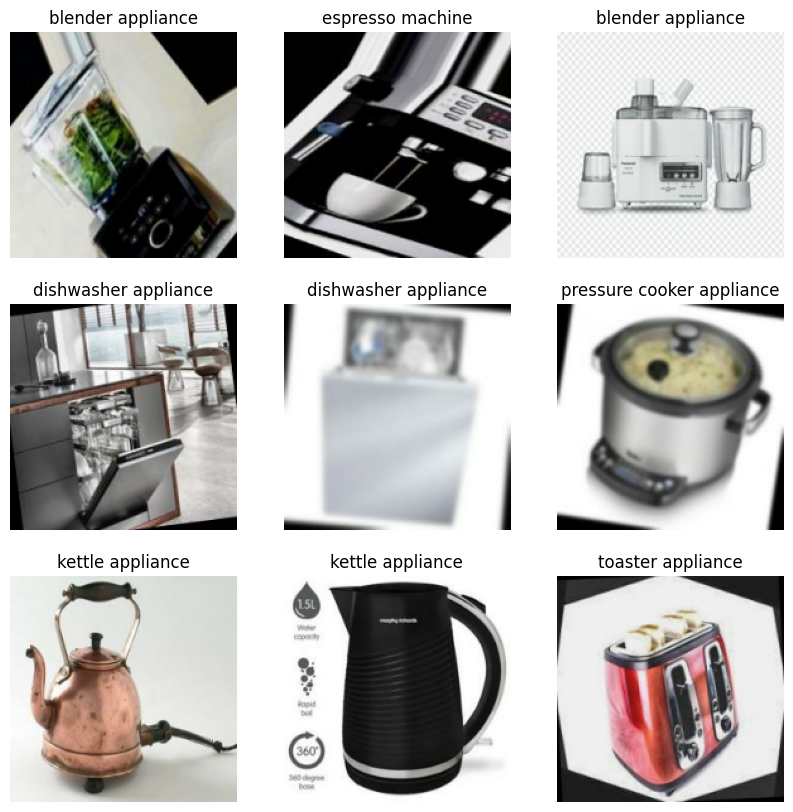

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # Set figure size

# Take one batch from the dataset
for images, labels in data_train.take(1):  
    num_images = min(9, len(images))  # Ensure there are enough images
    
    for i in range(num_images):  # Display up to 9 images
        plt.subplot(3, 3, i + 1)  
        plt.imshow(images[i].numpy().astype('uint8'))  # Convert tensor to NumPy
        
        # Convert one-hot encoded label to an integer index
        label_index = tf.argmax(labels[i]).numpy()  # Get the index of the maximum value in the one-hot vector
        class_name = data_cat.get(label_index, "Unknown")  # Get class name
        
        plt.title(class_name)  
        plt.axis("off")  # Hide axes

plt.show()


Sequential Model

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [108]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [109]:
import os

data_paths = [
    "C:/Kitchen Appliance Classification/dataset/train",
    "C:/Kitchen Appliance Classification/dataset/val",
    "C:/Kitchen Appliance Classification/dataset/test"
]

allowed_formats = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

for path in data_paths:
    print(f"Checking {path}...")
    for root, _, files in os.walk(path):
        for file in files:
            if not file.lower().endswith(allowed_formats):
                print(f"❌ Unsupported file found: {os.path.join(root, file)}")


Checking C:/Kitchen Appliance Classification/dataset/train...
Checking C:/Kitchen Appliance Classification/dataset/val...
Checking C:/Kitchen Appliance Classification/dataset/test...


In [110]:
from PIL import Image
import os

def convert_webp_to_jpg(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.webp'):
                webp_path = os.path.join(root, file)
                jpg_path = os.path.splitext(webp_path)[0] + ".jpg"

                # Convert and save
                with Image.open(webp_path) as img:
                    img.convert("RGB").save(jpg_path, "JPEG")

                # Delete original .webp file
                os.remove(webp_path)
                print(f"✅ Converted: {webp_path} → {jpg_path}")

# Convert all .webp images in your dataset
data_dirs = [
    "C:/Kitchen Appliance Classification/dataset/train",
    "C:/Kitchen Appliance Classification/dataset/val",
    "C:/Kitchen Appliance Classification/dataset/test"
]

for dir in data_dirs:
    convert_webp_to_jpg(dir)

print("🎉 Conversion complete!")


🎉 Conversion complete!


In [111]:
import os

dataset_path = "C:/Kitchen Appliance Classification/dataset"
supported_formats = (".jpg", ".jpeg", ".png", ".bmp")

for split in ["train", "val", "test"]:
    folder_path = os.path.join(dataset_path, split)
    for root, _, files in os.walk(folder_path):
        for file in files:
            if not file.lower().endswith(supported_formats):
                print(f"❌ Unsupported file found: {os.path.join(root, file)}")


In [112]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [113]:
import tensorflow as tf

def load_images(directory):
    return tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(180, 180),  # Adjust to your image size
        batch_size=32,
        validation_split=0.2,
        subset="training",
        seed=123
    )

try:
    data_train = load_images("C:/Kitchen Appliance Classification/dataset/train")
    data_val = load_images("C:/Kitchen Appliance Classification/dataset/val")
except Exception as e:
    print(f"Dataset loading error: {e}")


Found 9283 files belonging to 9 classes.
Using 7427 files for training.
Found 4096 files belonging to 9 classes.
Using 3277 files for training.


Found 9283 images belonging to 9 classes.
Found 4096 images belonging to 9 classes.
Found 3110 images belonging to 9 classes.


c:\Kitchen Appliance Classification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Kitchen Appliance Classification\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
291/291 ━━━━━━━━━━━━━━━━━━━━ 431s 1s/step - accuracy: 0.1481 - loss: 2.1721 - val_accuracy: 0.3237 - val_loss: 1.8554 - learning_rate: 0.0010
Epoch 2/25
291/291 ━━━━━━━━━━━━━━━━━━━━ 589s 2s/step - accuracy: 0.2949 - loss: 1.9020 - val_accuracy: 0.4600 - val_loss: 1.5674 - learning_rate: 0.0010
Epoch 3/25
291/291 ━━━━━━━━━━━━━━━━━━━━ 1992s 7s/step - accuracy: 0.3874 - loss: 1.7069 - val_accuracy: 0.5259 - val_loss: 1.3637 - learning_rate: 0.0010
Epoch 4/25
291/291 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.4487 - loss: 1.5633 - val_accuracy: 0.5889 - val_loss: 1.2427 - learning_rate: 0.0010
Epoch 5/25
291/291 ━━━━━━━━━━━━━━━━━━━━ 576s 2s/step - accuracy: 0.4839 - loss: 1.4626 - val_accuracy: 0.6167 - val_loss: 1.1490 - learning_rate: 0.0010
Epoch 6/25
291/291 ━━━━━━━━━━━━━━━━━━━━ 575s 2s/step - accuracy: 0.5296 - loss: 1.3348 - val_accuracy: 0.6299 - val_loss: 1.0891 - learning_rate: 0.0010
Epoch 7/25
291/291 ━━━━━━━━━━━━━━━━━━━━ 240s 827ms/step - accuracy: 0.5547 - loss

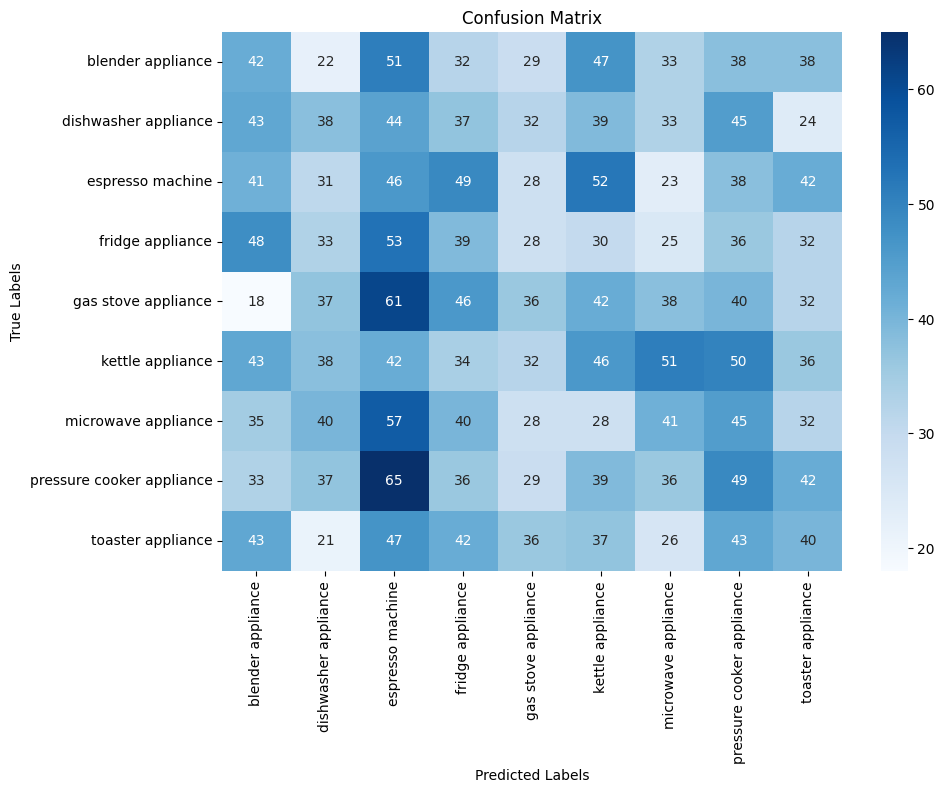

Model training and saving complete!


In [114]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define Image Size and Paths
img_width, img_height = 180, 180
dataset_path = r"C:\Kitchen Appliance Classification\dataset"  # Use raw string
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")

# --- Data Augmentation ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation & test

# --- Load Dataset Correctly ---
data_train = train_datagen.flow_from_directory(
    train_path, target_size=(img_width, img_height), batch_size=32, class_mode="categorical"
)

data_val = val_test_datagen.flow_from_directory(
    val_path, target_size=(img_width, img_height), batch_size=32, class_mode="categorical"
)

data_test = val_test_datagen.flow_from_directory(
    test_path, target_size=(img_width, img_height), batch_size=32, class_mode="categorical"
)

# --- Model Definition ---
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),  # Increase dropout to reduce overfitting
    layers.Dense(512, activation='relu'),
    layers.Dense(len(data_train.class_indices), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# --- Callbacks for Training ---
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, verbose=1
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True, verbose=1
)

# --- Model Training (Single Call) ---
epochs_size = 25
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
    callbacks=[early_stopping, lr_scheduler]
)

# --- Evaluate Model on Test Data ---
loss, accuracy = model.evaluate(data_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# --- Predictions and Confusion Matrix ---
# Get true labels and predicted labels
true_labels = data_test.classes
predictions = model.predict(data_test, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data_test.class_indices.keys(), yticklabels=data_test.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# --- Save the Model ---
model.save("kitchen_appliance_model.h5")
print("Model training and saving complete!")


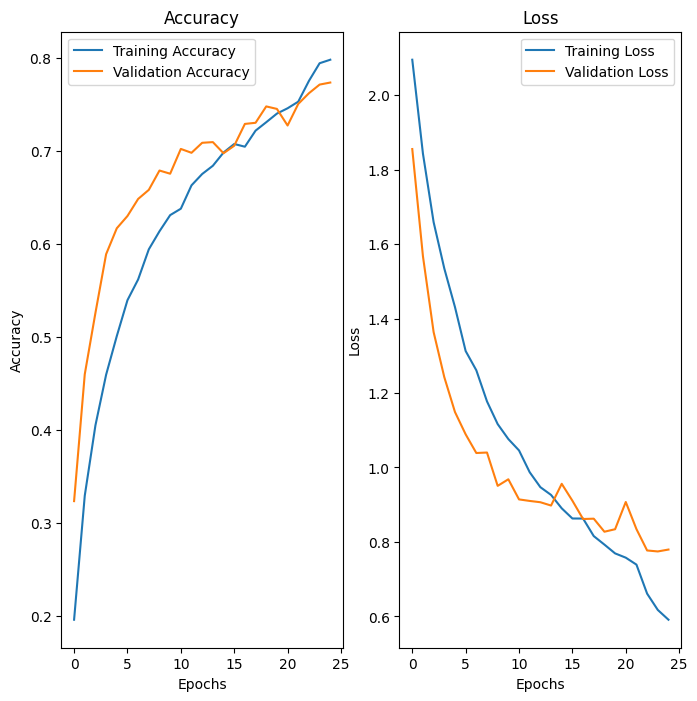

In [115]:
import matplotlib.pyplot as plt

# Ensure epochs_range matches the length of history logs
epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(8, 8))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [116]:
import numpy as np

def categorical_crossentropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-9, 1.0)  # Avoid log(0) errors
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

# Example usage
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # One-hot encoded labels
y_pred = np.array([[0.8, 0.1, 0.1], [0.2, 0.6, 0.2], [0.1, 0.2, 0.7]])  # Model predictions

loss = categorical_crossentropy(y_true, y_pred)
print("Categorical Cross-Entropy Loss:", loss)


Categorical Cross-Entropy Loss: 0.3635480396729776


EValuate on test data

In [117]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(data_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.8406 - loss: 0.6041
Test Loss: 0.6088403463363647
Test Accuracy: 0.834083616733551


Confusion Matrix

Classification report

In [118]:
# Get true labels from test data
y_true = []
y_pred = []

# Iterate through test data
for images, labels in data_test:
    preds = model.predict(images)  # Get predictions
    y_pred.extend(np.argmax(preds, axis=1))  # Convert to class indices
    y_true.extend(np.argmax(labels, axis=1))  # Convert one-hot labels to class indices

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=data_cat)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

In [61]:
model.save("kitchen_appliance_model.keras")  # Save the trained model in the new format
